In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
card_ds = pd.read_csv('./creditcard.csv')
card_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
card_ds.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
card_ds.shape

(284807, 31)

Amount 피처는 신용카드 사용 금액을 의미.

Time 피처는 의미가 없는 피처임으로 삭제해도 될 것 같음.

V1~V28 피처는 의미를 알 수 없습니다. 개인정보에 관련된 피처 같음.

In [9]:
print('결측치')
print('-'*30)
print(card_ds.isna().sum())

결측치
------------------------------
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [10]:
print('클래스 값 분포')
print('-'*30)
print(card_ds.iloc[:,-1].value_counts())

클래스 값 분포
------------------------------
0    284315
1       492
Name: Class, dtype: int64


c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

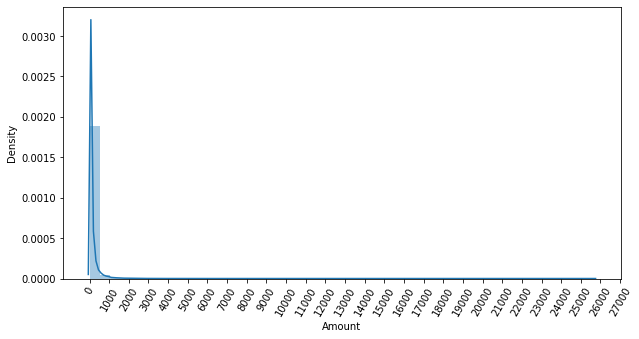

In [11]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_ds['Amount'])

카드 사용 금액이 0에서 1000달러 이하인 데이터가 대부분입니다. 

신용 카드로 10만원 이상 쓰는 사람이 많지 않아 보임

불균형한 데이터이기 때문에 Stratified 방식으로 나눠야 Class의 분포가 균등하게 나눠질 수 있음

데이터의 원본을 유지한 채로 데이터를 전처리하고 나누기 위해 

get_preprocessed_df 와 get_train_test_dataset 함수를 만들어 진행

### 학습용/테스트용 데이터 나누기

In [12]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis=1,inplace=True)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, 
                                                      random_state=0, stratify = y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_ds)


print(y_train.value_counts()/y_train.shape[0]*100)  # 학습 데이터 레이블 값 비율
print(y_test.value_counts()/y_test.shape[0]*100)    # 테스트 데이터 레이블 값 비율

0    99.827451
1     0.172549
Name: Class, dtype: float64
0    99.826785
1     0.173215
Name: Class, dtype: float64


### 데이터 전처리 후 모델 학습/예측/평가

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    
def get_model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)
    pred = model.predict(feature_test)
    pred_proba = model.predict_proba(feature_test)[:,1]
    # confusion=confusion_matrix(target_test,pred)
    
    accuracy = accuracy_score(target_test,pred)
    precision = precision_score(target_test,pred)
    recall = recall_score(target_test,pred)
    f1 = f1_score(target_test,pred)
    roc_auc = roc_auc_score(target_test,pred_proba)
    
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1_score: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [14]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('-'*50)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('-'*50)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)
print('-'*50)


--------------------------------------------------
로지스틱 회귀 성능


c:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9992, precision: 0.8762, recall: 0.6216, F1_score: 0.7273, AUC: 0.9592
--------------------------------------------------
LightGBM 성능
accuracy: 0.9995, precision: 0.9573, recall: 0.7568, F1_score: 0.8453, AUC: 0.9790
--------------------------------------------------


### 데이터 분포도 변환

#### 1. 정규화

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


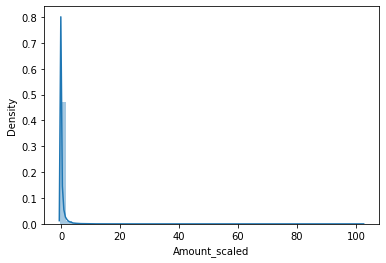

In [15]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_StandardScaled=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_scaled',amount_StandardScaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_ds)

In [16]:
lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('-'*50)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('-'*50)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)
print('-'*50)

--------------------------------------------------
로지스틱 회귀 성능
accuracy: 0.9992, precision: 0.8654, recall: 0.6081, F1_score: 0.7143, AUC: 0.9702
--------------------------------------------------
LightGBM 성능
accuracy: 0.9995, precision: 0.9569, recall: 0.7500, F1_score: 0.8409, AUC: 0.9779
--------------------------------------------------


#### 2. 로그변환

c:\Anaconda3\envs\tf_pt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


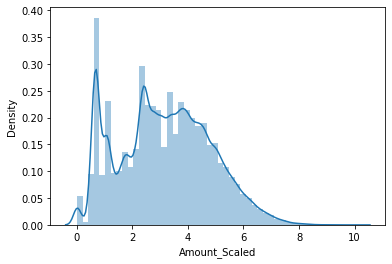

In [18]:
def get_preprocessed_df(df):
    df_copy = df.copy()
    amount_log_Scaled=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_log_Scaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    sns.distplot(df_copy['Amount_Scaled'])
    return df_copy

X_train, X_test, y_train, y_test=get_train_test_dataset(card_ds)

In [19]:
lr_clf=LogisticRegression()
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)

print('-'*50)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('-'*50)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)
print('-'*50)

--------------------------------------------------
로지스틱 회귀 성능
accuracy: 0.9992, precision: 0.8812, recall: 0.6014, F1_score: 0.7149, AUC: 0.9727
--------------------------------------------------
LightGBM 성능
accuracy: 0.9995, precision: 0.9576, recall: 0.7635, F1_score: 0.8496, AUC: 0.9796
--------------------------------------------------


### 이상치 데이터 제거

<AxesSubplot:>

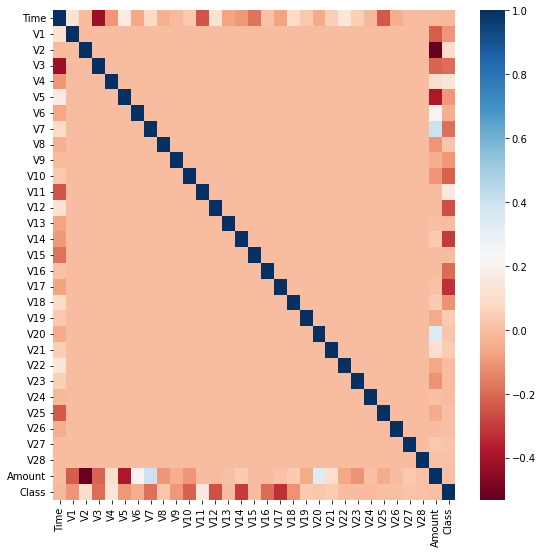

In [20]:
plt.figure(figsize=(9,9))
corr=card_ds.corr()
sns.heatmap(corr,cmap='RdBu')

In [21]:
import numpy as np

def get_outlier(df,column,weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)
    iqr = quantile_75-quantile_25
    iqr_weighted = iqr*weight
    lowest_val = quantile_25-iqr_weighted
    highest_val = quantile_75+iqr_weighted
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

print('-'*50)
outlier_index_V14 = get_outlier(card_ds, 'V14', 1.5)
print('V14 이상치 데이터 인덱스: ',outlier_index_V14)
print('-'*50)
outlier_index_V17 = get_outlier(card_ds, 'V17', 1.5)
print('V17 이상치 데이터 인덱스: ',outlier_index_V17)
print('-'*50)

--------------------------------------------------
V14 이상치 데이터 인덱스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')
--------------------------------------------------
V17 이상치 데이터 인덱스:  Int64Index([], dtype='int64')
--------------------------------------------------


In [22]:
def get_preprocessed_df(df):
    df_copy = df.copy()
    amount_log_Scaled=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_log_Scaled)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    outlier_index_V14=get_outlier(df_copy,'V14',1.5)
    df_copy.drop(outlier_index_V14,axis=0,inplace=True)
    return df_copy

print('-'*50)
print('V14 이상치 제거')
X_train, X_test, y_train, y_test = get_train_test_dataset(card_ds)

print('-'*50)
print('로지스틱 회귀 성능')
get_model_train_eval(lr_clf,X_train,X_test,y_train,y_test)

print('-'*50)
print('LightGBM 성능')
get_model_train_eval(lgbm_clf, X_train,X_test, y_train, y_test)
print('-'*50)

--------------------------------------------------
V14 이상치 제거
--------------------------------------------------
로지스틱 회귀 성능
accuracy: 0.9993, precision: 0.8750, recall: 0.6712, F1_score: 0.7597, AUC: 0.9743
--------------------------------------------------
LightGBM 성능
accuracy: 0.9996, precision: 0.9603, recall: 0.8288, F1_score: 0.8897, AUC: 0.9780
--------------------------------------------------
